In [22]:
import pandas as pd 
import numpy as np
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Sentiment Analysis of Fake vs Real News and their titles

With a sentiment analysis I want to take a look at titles for fake news versus real news. 

- Do fake news have more extremist or sentimental titles? Do they appeal to any feeling at all or are they neutral?

With VADER, we are going to try to take a look at the news and classify the sentiment of our news.

##### VADER (Valence Aware Dictionary and Sentiment Reasoner): lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.

In [6]:
#importing our dataset

train_news = pd.read_csv('./data/clean_news.csv')

In [7]:
train_news.head()

,Unnamed: 0,author,title,text,label
0,0,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,Daniel J. Flynn,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0
2,2,Consortiumnews.com,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1
3,3,Jessica Purkiss,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Howard Portnoy,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1


In [8]:
analyser = SentimentIntensityAnalyzer()

In [9]:
def sentiment_analyzer_scores(sentence):
    return analyser.polarity_scores(sentence)['compound']

In [13]:
df_sentiment = train_news.drop('Unnamed: 0', axis=1)

In [15]:
df_sentiment['vader'] = train_news.title.apply(sentiment_analyzer_scores)

In [16]:
# Convert float score to category based on binning
df_sentiment['vader'] = pd.cut(df_sentiment['vader'], bins=2, labels=[0,1])
df_sentiment

,author,title,text,label,vader
0,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1,0
1,Daniel J. Flynn,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0,0
2,Consortiumnews.com,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1,0
3,Jessica Purkiss,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1,0
4,Howard Portnoy,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1,0
...,...,...,...,...,...
19343,Jerome Hudson,Rapper T.I.: Trump a ’Poster Child For White S...,Rapper T. I. unloaded on black celebrities who...,0,0
19344,Benjamin Hoffman,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",When the Green Bay Packers lost to the Washing...,0,0
19345,Michael J. de la Merced and Rachel Abrams,Macy’s Is Said to Receive Takeover Approach by...,The Macy’s of today grew from the union of sev...,0,0
19346,Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...","NATO, Russia To Hold Parallel Exercises In Bal...",1,0


In [19]:
(df_sentiment.label == df_sentiment.vader).value_counts(normalize=True) # accuracy

True     0.52486
False    0.47514
dtype: float64

In [21]:
df_sentiment.groupby(['label','vader']).vader.count()

label  vader
0      0        8014
       1        2368
1      0        6825
       1        2141
Name: vader, dtype: int64

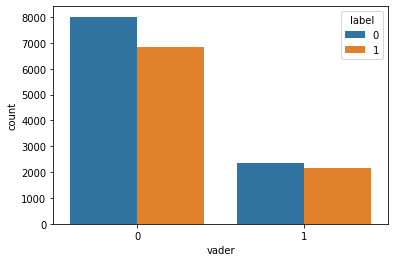

In [24]:
sns.countplot(x='vader', hue='label', data=df_sentiment)

As we can see, not all the fake news have sentiment oriented titles, moreover, there are actually more real news with a sentiment. Since this is not a key feature, we won't take it into account for our machine learning models. 